In [188]:
# Standard libraries
import os
import math
import numpy as np 
import time

# Imports for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import to_rgba

# Progress bar
from tqdm import tqdm

In [189]:
import torch
print("Using torch", torch.__version__)

Using torch 2.2.0


In [190]:
torch.manual_seed(42) # Setting the seed

#### Initialization

In [191]:
x = torch.Tensor(2, 3, 4) # (C, H, W)
print(x)

tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 6.3112e-04,  4.5562e-41,  6.3112e-04,  4.5562e-41],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 9.8235e+13,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [-7.1714e-31,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [-7.1743e-31,  0.0000e+00, -7.2173e-31,  0.0000e+00]]])


The function `torch.Tensor` allocates memory for the desired tensor, but reuses any values that have already been in the memory. To directly assign values to the tensor during initialization, there are many alternatives including:

이 함수는 원하는 텐서에 메모리를 할당하지만, 이미 메모리에 있던 모든 값을 재사용합니다. \
초기화 중에 텐서에 값을 직접 할당하려면 다음을 포함한 다양한 대안이 있습니다.

* `torch.zeros`: Creates a tensor filled with zeros
* `torch.ones`: Creates a tensor filled with ones
* `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
* `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
* `torch.arange`: Creates a tensor containing the values $N,N+1,N+2,...,M$
* `torch.Tensor` (input list): Creates a tensor from the list elements you provide

In [192]:
# Create a tensor from a (nested) list
# 중첩 리스트(리스트 안에 또 다른 리스트가 있는 구조)
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [193]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


You can obtain the shape of a tensor in the same way as in numpy (`x.shape`), or using the `.size` method:

In [194]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


#### Tensor to Numpy, and Numpy to Tensor

Tensors can be converted to numpy arrays, and numpy arrays back to tensors. To transform a numpy array into a tensor, we can use the function `torch.from_numpy`.

In [195]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


To transform a PyTorch tensor back to a numpy array, we can use the function `.numpy()` on tensors:

In [196]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


The conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU (more on GPU support in a later section). In case you have a tensor on GPU, you need to call `.cpu()` on the tensor beforehand. Hence, you get a line like `np_arr = tensor.cpu().numpy()`.

텐서를 numpy로 변환하려면 텐서가 GPU가 아닌 CPU에 있어야 합니다.

#### Operations

In [197]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


Calling `x1 + x2` creates a new tensor containing the sum of the two inputs. However, we can also use in-place operations that are applied directly on the memory of a tensor. We therefore change the values of `x2` without the chance to re-accessing the values of `x2` before the operation. An example is shown below:

In [198]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (before) tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
X1 (after) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (after) tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])


In-place operations are usually marked with a underscore postfix (e.g. "add_" instead of "add").

Another common operation aims at changing the shape of a tensor. A tensor of size (2,3) can be re-organized to any other shape with the same number of elements (e.g. a tensor of size (6), or (3,2), ...). In PyTorch, this operation is called `view`:

In [199]:
x = torch.arange(6)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])


In [200]:
x = x.view(2, 3) # 동일한 수의 요소를 갖는 다른 모양으로 재구성
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [201]:
x = x.permute(1, 0) # Swapping dimension 0 and 1
print("X", x)

X tensor([[0, 3],
        [1, 4],
        [2, 5]])


Other commonly used operations include matrix multiplications, which are essential for neural networks. Quite often, we have an input vector $\mathbf{x}$, which is transformed using a learned weight matrix $\mathbf{W}$. There are multiple ways and functions to perform matrix multiplication, some of which we list below:

* `torch.matmul`: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting (for details see the [documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)). Can also be written as `a @ b`, similar to numpy. 
* `torch.mm`: Performs the matrix product over two matrices, but doesn't support broadcasting (see [documentation](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm))
* `torch.bmm`: Performs the matrix product with a support batch dimension. If the first tensor $T$ is of shape ($b\times n\times m$), and the second tensor $R$ ($b\times m\times p$), the output $O$ is of shape ($b\times n\times p$), and has been calculated by performing $b$ matrix multiplications of the submatrices of $T$ and $R$: $O_i = T_i @ R_i$
* `torch.einsum`: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention. Explanation of the Einstein sum can be found in assignment 1.

Usually, we use `torch.matmul` or `torch.bmm`. We can try a matrix multiplication with `torch.matmul` below.

In [202]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [203]:
W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [204]:
h = torch.matmul(x, W)
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


#### Indexing

In [205]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [206]:
print(x[:, 1])   # Second column

tensor([1, 5, 9])


In [207]:
print(x[0])      # First row

tensor([0, 1, 2, 3])


In [208]:
print(x[:2, -1]) # First two rows, last column

tensor([3, 7])


In [209]:
print(x[1:3, :]) # Middle two rows

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


### Dynamic Computation Graph and Backpropagation

One of the main reasons for using PyTorch in Deep Learning projects is that we can automatically get **gradients/derivatives** of functions that we define. We will mainly use PyTorch for implementing neural networks, and they are just fancy functions. If we use weight matrices in our function that we want to learn, then those are called the **parameters** or simply the **weights**.

If our neural network would output a single scalar value, we would talk about taking the **derivative**, but you will see that quite often we will have **multiple** output variables ("values"); in that case we talk about **gradients**. It's a more general term.

Given an input $\mathbf{x}$, we define our function by **manipulating** that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a **computational graph**. This graph shows how to arrive at our output from our input. 
PyTorch is a **define-by-run** framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

So, to recap: the only thing we have to do is to compute the **output**, and then we can ask PyTorch to automatically get the **gradients**. 

> **Note:  Why do we want gradients?** Consider that we have defined a function, a neural net, that is supposed to compute a certain output $y$ for an input vector $\mathbf{x}$. We then define an **error measure** that tells us how wrong our network is; how bad it is in predicting output $y$ from input $\mathbf{x}$. Based on this error measure, we can use the gradients to **update** the weights $\mathbf{W}$ that were responsible for the output, so that the next time we present input $\mathbf{x}$ to our network, the output will be closer to what we want.

The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.

위 내용은 PyTorch를 사용하여 심층 학습 프로젝트를 수행할 때 자동으로 함수의 **그래디언트(미분)** 를 얻을 수 있는 이유와 방법에 대해 설명하고 있습니다. \
신경망은 복잡한 함수로 볼 수 있으며, 이 함수를 정의할 때 사용하는 가중치 행렬을 **파라미터** 또는 **가중치**라고 부릅니다. \
신경망의 출력이 스칼라 값 하나일 경우 **도함수**라고 하며, 출력 변수가 여러 개일 경우 이를 **그래디언트**라고 합니다. 여기서는 그래디언트라는 용어가 더 일반적으로 사용됩니다.

함수의 입력 $\mathbf{x}$에 대해, 이 입력을 조작(주로 가중치 행렬과 바이어스 벡터를 이용한 행렬 곱셈 및 덧셈 등)하여 신경망 함수를 정의하면, 자동으로 **계산 그래프**가 생성됩니다.\
 이 그래프는 입력에서 출력으로 가는 계산 방법을 보여줍니다. PyTorch는 **정의에 의한 실행(define-by-run)** 프레임워크로, 조작을 수행하면서 동적으로 계산 그래프를 생성하고 이를 추적합니다.

**그래디언트가 필요한 이유는** 신경망이 입력 $\mathbf{x}$에서 원하는 출력 $y$를 예측하는 데 얼마나 잘못되었는지를 알려주는 **오차 측정**을 정의하고,\
 이를 바탕으로 그래디언트를 사용하여 출력을 담당한 가중치 $\mathbf{W}$를 업데이트하여, 다음에 동일한 입력 $\mathbf{x}$이 제공될 때 출력이 원하는 값에 더 가까워지도록 만들기 위함입니다.

텐서가 그래디언트를 필요로 하는지 여부는 기본적으로 설정되지 않으므로, `requires_grad=True`를 통해 이를 설정할 수 있습니다. 

계산 그래프에 익숙해지기 위해 다음 함수에 대한 그래프를 생성합니다:

$$y = \frac{1}{\ell(x)}\sum_i \left[(x_i + 2)^2 + 3\right],$$

여기서 $\ell(x)$는 $x$의 요소 수를 나타냅니다. 즉, 합산 내부 연산에 대한 평균을 취하고 있습니다. \
$x$를 파라미터로 생각하고, 출력 $y$를 최적화(최대화 또는 최소화)하려고 합니다. \
이를 위해 그래디언트 $\partial y / \partial \mathbf{x}$를 얻고자 합니다. 예제에서는 $\mathbf{x}=[0,1,2]$를 입력으로 사용합니다.

주어진 연산을 단계별로 수행하여 계산 그래프를 구성하고, `backward()` 함수를 호출하여 각 `requires_grad=True` 속성을 가진 텐서의 그래디언트를 자동으로 계산할 수 있습니다.

실제 그래디언트를 수동으로 계산하여 PyTorch가 계산한 그래디언트와 비교할 수도 있습니다. \
체인룰을 사용하여 그래디언트를 계산하고, $\mathbf{x}=[0,1,2]$에 대한 그래디언트가 $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$임을 확인할 수 있습니다. 이는 PyTorch를 통해 얻은 결과와 동일해야 합니다.

In [210]:
x = torch.ones((3,))
print(x.requires_grad)

False


We can change this for an existing tensor using the function `requires_grad_()` (underscore indicating that this is a in-place operation). Alternatively, when creating a tensor, you can pass the argument `requires_grad=True` to most initializers we have seen above.

In [211]:
x.requires_grad_(True)
print(x.requires_grad)

True


In order to get familiar with the concept of a computation graph, we will create one for the following function:

$$y = \frac{1}{\ell(x)}\sum_i \left[(x_i + 2)^2 + 3\right],$$

where we use $\ell(x)$ to denote the number of elements in $x$. In other words, we are taking a mean here over the operation within the sum. You could imagine that $x$ are our parameters, and we want to optimize (either maximize or minimize) the output $y$. For this, we want to obtain the gradients $\partial y / \partial \mathbf{x}$. For our example, we'll use $\mathbf{x}=[0,1,2]$ as our input.

In [212]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


Now let's build the computation graph step by step. You can combine multiple operations in a single line, but we will separate them here to get a better understanding of how each operation is added to the computation graph.

In [213]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


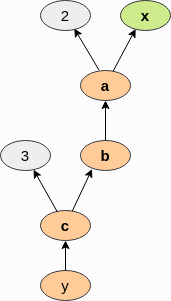

We calculate $a$ based on the inputs $x$ and the constant $2$, $b$ is $a$ squared, and so on. The visualization is an abstraction of the dependencies between inputs and outputs of the operations we have applied.
Each node of the computation graph has automatically defined a function for calculating the gradients with respect to its inputs, `grad_fn`. You can see this when we printed the output tensor $y$. This is why the computation graph is usually visualized in the reverse direction (arrows point from the result to the inputs). We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:

In [214]:
y.backward()

`x.grad` will now contain the gradient $\partial y/ \partial \mathcal{x}$, and this gradient indicates how a change in $\mathbf{x}$ will affect output $y$ given the current input $\mathbf{x}=[0,1,2]$:

In [215]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


We can also verify these gradients by hand. We will calculate the gradients using the chain rule, in the same way as PyTorch did it:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

Note that we have simplified this equation to index notation, and by using the fact that all operation besides the mean do not combine the elements in the tensor. The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.

### GPU support

A crucial feature of PyTorch is the support of GPUs, short for Graphics Processing Unit. A GPU can perform many thousands of small operations in parallel, making it very well suitable for performing large matrix operations in neural networks. When comparing GPUs to CPUs, we can list the following main differences (credit: [Kevin Krewell, 2009]

GPU는 수천 개의 작은 작업을 병렬로 수행할 수 있으므로 신경망에서 대규모 행렬 작업을 수행하는 데 매우 적합합니다.

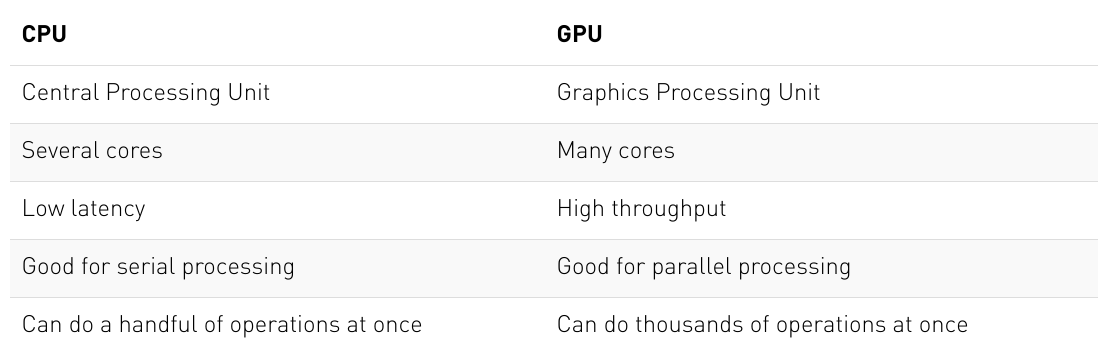

CPUs and GPUs have both different advantages and disadvantages, which is why many computers contain both components and use them for different tasks.

CPU와 GPU는 서로 다른 장점과 단점을 갖고 있으며, 이는 많은 컴퓨터가 두 구성 요소를 모두 포함하고 이를 다양한 작업에 사용하는 이유입니다.

 In case you are not familiar with GPUs, you can read up more details in this [NVIDIA blog post](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/) or [here](https://www.intel.com/content/www/us/en/products/docs/processors/what-is-a-gpu.html). 

GPUs can accelerate the training of your network up to a factor of $100$ which is essential for large neural networks. PyTorch implements a lot of functionality for supporting GPUs (mostly those of NVIDIA due to the libraries [CUDA](https://developer.nvidia.com/cuda-zone) and [cuDNN](https://developer.nvidia.com/cudnn)). First, let's check whether you have a GPU available:

In [216]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


By default, all tensors you create are stored on the CPU.

기본적으로 생성한 모든 텐서는 CPU에 저장됩니다.

In [217]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


In [218]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In case you have a GPU, you should now see the attribute `device='cuda:0'` being printed next to your tensor. The zero next to cuda indicates that this is the zero-th GPU device on your computer. PyTorch also supports multi-GPU systems, but this you will only need once you have very big networks to train (if interested, see the [PyTorch documentation](https://pytorch.org/docs/stable/distributed.html#distributed-basics)). We can also compare the runtime of a large matrix multiplication on the CPU with a operation on the GPU:

cuda:0은 컴퓨터의 0번째 GPU 장치임을 나타냅니다. PyTorch는 다중 GPU 시스템도 지원하지만, 훈련할 네트워크가 매우 큰 경우에만 필요합니다.

In [219]:
x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
_ = torch.matmul(x, x)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

CPU time: 0.32595s
GPU time: 0.01133s


Depending on the size of the operation and the CPU/GPU in your system, the speedup of this operation can be >50x. As `matmul` operations are very common in neural networks, we can already see the great benefit of training a NN on a GPU. The time estimate can be relatively noisy here because we haven't run it for multiple times. Feel free to extend this, but it also takes longer to run.

When generating random numbers, the seed between CPU and GPU is not synchronized. Hence, we need to set the seed on the GPU separately to ensure a reproducible code. Note that due to different GPU architectures, running the same code on different GPUs does not guarantee the same random numbers. Still, we don't want that our code gives us a different output every time we run it on the exact same hardware. Hence, we also set the seed on the GPU:

난수를 생성할 때 CPU와 GPU 간의 시드가 동기화되지 않습니다. 따라서 재현 가능한 코드를 보장하려면 GPU에 시드를 별도로 설정해야 합니다.

In [220]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available(): 
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
    
# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Learning by example: Continuous XOR

If we want to build a neural network in PyTorch, we could specify all our parameters (weight matrices, bias vectors) using `Tensors` (with `requires_grad=True`), ask PyTorch to calculate the gradients and then adjust the parameters. But things can quickly get cumbersome if we have a lot of parameters. In PyTorch, there is a package called `torch.nn` that makes building neural networks more convenient. 

We will introduce the libraries and all additional parts you might need to train a neural network in PyTorch, using a simple example classifier on a simple yet well known example: XOR. Given two binary inputs $x_1$ and $x_2$, the label to predict is $1$ if either $x_1$ or $x_2$ is $1$ while the other is $0$, or the label is $0$ in all other cases. The example became famous by the fact that a single neuron, i.e. a linear classifier, cannot learn this simple function.
Hence, we will learn how to build a small neural network that can learn this function. 
To make it a little bit more interesting, we move the XOR into continuous space and introduce some gaussian noise on the binary inputs. Our desired separation of an XOR dataset could look as follows:

위 내용은 PyTorch를 사용하여 신경망을 구축하는 방법을 설명하고 있습니다.\
PyTorch에서는 가중치 행렬, 바이어스 벡터와 같은 파라미터를 `Tensors` ( `requires_grad=True` 사용)로 지정하고 PyTorch에 그래디언트 계산을 요청한 다음 파라미터를 조정할 수 있습니다.\
 하지만 많은 파라미터가 있을 경우 이 과정이 복잡해질 수 있습니다. 이를 해결하기 위해 PyTorch에는 `torch.nn`이라는 패키지가 있어 신경망 구축을 더 편리하게 만들어 줍니다.


여기서는 XOR이라는 간단하지만 잘 알려진 예제 분류기를 사용하여 PyTorch에서 신경망을 훈련하는 데 필요한 라이브러리와 모든 추가 부분을 소개합니다. \
두 이진 입력 $x_1$과 $x_2$가 주어졌을 때, 하나는 1이고 다른 하나는 0인 경우 예측 레이블은 1이 되며, 그 외의 모든 경우에는 레이블이 0이 됩니다. \
이 예제는 단일 뉴런(즉, 선형 분류기)이 이 간단한 함수를 학습할 수 없다는 사실로 유명해졌습니다. 따라서, 이 함수를 학습할 수 있는 작은 신경망을 구축하는 방법을 배우게 됩니다. \
조금 더 흥미롭게 만들기 위해 XOR을 연속 공간으로 이동시키고 이진 입력에 가우시안 노이즈를 도입합니다. 우리가 원하는 XOR 데이터셋의 분리는 위 이미지와 같습니다.

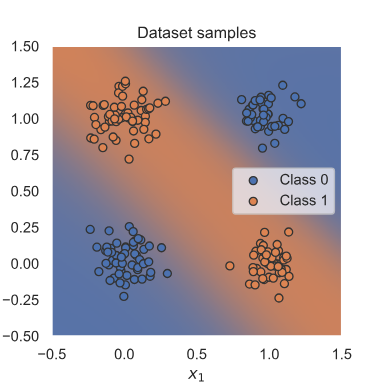

### The model

The package `torch.nn` defines a series of useful classes like linear networks layers, activation functions, loss functions etc. A full list can be found [here](https://pytorch.org/docs/stable/nn.html). In case you need a certain network layer, check the documentation of the package first before writing the layer yourself as the package likely contains the code for it already. We import it below:

In [221]:
import torch.nn as nn

Additionally to `torch.nn`, there is also `torch.nn.functional`. It contains functions that are used in network layers. This is in contrast to `torch.nn` which defines them as `nn.Modules` (more on it below), and `torch.nn` actually uses a lot of functionalities from `torch.nn.functional`. Hence, the functional package is useful in many situations, and so we import it as well here.

In [222]:
import torch.nn.functional as F

#### nn.Module

In PyTorch, a neural network is built up out of modules. Modules can contain other modules, and a neural network is considered to be a module itself as well. The basic template of a module is as follows:

PyTorch에서 신경망은 모듈로 구성됩니다. \
모듈은 다른 모듈을 포함할 수 있으며 신경망도 모듈 자체로 간주됩니다. \

In [223]:
class MyModule(nn.Module):
    
    def __init__(self):
        super().__init__()
        # Some init for my module
        
    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

The forward function is where the computation of the module is taken place, and is executed when you call the module (`nn = MyModule(); nn(x)`). In the init function, we usually create the parameters of the module, using `nn.Parameter`, or defining other modules that are used in the forward function. The backward calculation is done automatically, but could be overwritten as well if wanted.

#### Simple classifier
We can now make use of the pre-defined modules in the `torch.nn` package, and define our own small neural network. We will use a minimal network with a input layer, one hidden layer with tanh as activation function, and a output layer. In other words, our networks should look something like this:

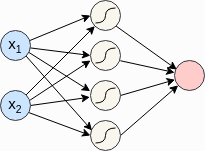

The input neurons are shown in blue, which represent the coordinates $x_1$ and $x_2$ of a data point. The hidden neurons including a tanh activation are shown in white, and the output neuron in red.
In PyTorch, we can define this as follows:

In [224]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

For the examples in this notebook, we will use a tiny neural network with two input neurons and four hidden neurons. As we perform binary classification, we will use a single output neuron. Note that we do not apply a sigmoid on the output yet. This is because other functions, especially the loss, are more efficient and precise to calculate on the original outputs instead of the sigmoid output. We will discuss the detailed reason later.

In [225]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


Printing the model lists all submodules it contains. The parameters of a module can be obtained by using its `parameters()` functions, or `named_parameters()` to get a name to each parameter object. For our small neural network, we have the following parameters:

In [226]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


Each linear layer has a weight matrix of the shape `[output, input]`, and a bias of the shape `[output]`. The tanh activation function does not have any parameters. Note that parameters are only registered for `nn.Module` objects that are direct object attributes, i.e. `self.a = ...`. If you define a list of modules, the parameters of those are not registered for the outer module and can cause some issues when you try to optimize your module. There are alternatives, like `nn.ModuleList`, `nn.ModuleDict` and `nn.Sequential`, that allow you to have different data structures of modules. We will use them in a few later tutorials and explain them there. 

활성화 함수에는 매개변수가 없습니다.

### The data

PyTorch also provides a few functionalities to load the training and test data efficiently, summarized in the package `torch.utils.data`.

In [227]:
import torch.utils.data as data

The data package defines two classes which are the standard interface for handling data in PyTorch: `data.Dataset`, and `data.DataLoader`. The dataset class provides an uniform interface to access the training/test data, while the data loader makes sure to efficiently load and stack the data points from the dataset into batches during training.

#### The dataset class

The dataset class summarizes the basic functionality of a dataset in a natural way. To define a dataset in PyTorch, we simply specify two functions: `__getitem__`, and `__len__`. The get-item function has to return the $i$-th data point in the dataset, while the len function returns the size of the dataset. For the XOR dataset, we can define the dataset class as follows:

In [228]:
class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

Let's try to create such a dataset and inspect it:

In [229]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([0.9632, 0.1117]), tensor(1))


To better relate to the dataset, we visualize the samples below. 

In [230]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    
    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

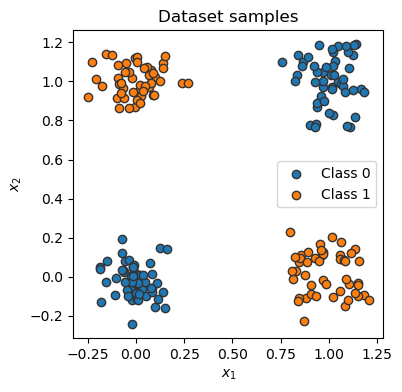

In [231]:
visualize_samples(dataset.data, dataset.label)
plt.show()

#### The data loader class

The class `torch.utils.data.DataLoader` represents a Python iterable over a dataset with support for automatic batching, multi-process data loading and many more features. The data loader communicates with the dataset using the function `__getitem__`, and stacks its outputs as tensors over the first dimension to form a batch.
In contrast to the dataset class, we usually don't have to define our own data loader class, but can just create an object of it with the dataset as input. Additionally, we can configure our data loader with the following input arguments (only a selection, see full list [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)):

* `batch_size`: Number of samples to stack per batch
* `shuffle`: If True, the data is returned in a random order. This is important during training for introducing stochasticity. 
* `num_workers`: Number of subprocesses to use for data loading. The default, 0, means that the data will be loaded in the main process which can slow down training for datasets where loading a data point takes a considerable amount of time (e.g. large images). More workers are recommended for those, but can cause issues on Windows computers. For tiny datasets as ours, 0 workers are usually faster.
* `pin_memory`: If True, the data loader will copy Tensors into CUDA pinned memory before returning them. This can save some time for large data points on GPUs. Usually a good practice to use for a training set, but not necessarily for validation and test to save memory on the GPU.
* `drop_last`: If True, the last batch is dropped in case it is smaller than the specified batch size. This occurs when the dataset size is not a multiple of the batch size. Only potentially helpful during training to keep a consistent batch size.

위 내용은 PyTorch의 `torch.utils.data.DataLoader` 클래스에 대해 설명하고 있습니다. `DataLoader`는 데이터셋을 반복하는 파이썬 이터러블로, 자동 배치 생성, 멀티프로세스 데이터 로딩 등 많은 기능을 지원합니다. 데이터 로더는 `__getitem__` 함수를 사용하여 데이터셋과 통신하며, 그 출력을 첫 번째 차원에 걸쳐 텐서로 쌓아 배치를 형성합니다.

데이터셋 클래스와 달리, 우리는 보통 자체 데이터 로더 클래스를 정의할 필요가 없으며, 데이터셋을 입력으로 하여 객체를 생성하기만 하면 됩니다. 또한, 다음 입력 인자들을 통해 데이터 로더를 구성할 수 있습니다(전체 목록은 [여기](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)에서 확인 가능):

- `batch_size`: 배치당 쌓을 샘플 수
- `shuffle`: True인 경우, 데이터가 무작위 순서로 반환됩니다. 이는 훈련 동안 확률성을 도입하기 위해 중요합니다.
- `num_workers`: 데이터 로딩을 위해 사용할 서브프로세스의 수입니다. 기본값인 0은 데이터가 메인 프로세스에서 로드됨을 의미하며, 데이터 포인트를 로드하는 데 상당한 시간이 걸리는 데이터셋(예: 큰 이미지)의 훈련을 느리게 할 수 있습니다. 그러한 경우에는 더 많은 워커가 권장되지만, 윈도우 컴퓨터에서는 문제를 일으킬 수 있습니다. 우리의 작은 데이터셋과 같은 경우에는 0 워커가 보통 더 빠릅니다.
- `pin_memory`: True인 경우, 데이터 로더는 반환하기 전에 텐서를 CUDA 고정 메모리로 복사합니다. 이는 GPU에서 큰 데이터 포인트에 대한 시간을 절약할 수 있습니다. 훈련 세트에 대해 사용하는 것이 좋은 관행이지만, 메모리를 절약하기 위해 검증 및 테스트 세트에는 반드시 필요하지 않습니다.
- `drop_last`: True인 경우, 지정된 배치 크기보다 작은 마지막 배치가 드롭됩니다. 이는 데이터셋 크기가 배치 크기의 배수가 아닐 때 발생합니다. 일관된 배치 크기를 유지하기 위해 훈련 중에만 유용할 수 있습니다.


In [232]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [233]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the 
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[-0.0890,  0.8608],
        [ 1.0905, -0.0128],
        [ 0.7967,  0.2268],
        [-0.0688,  0.0371],
        [ 0.8732, -0.2240],
        [-0.0559, -0.0282],
        [ 0.9277,  0.0978],
        [ 1.0150,  0.9689]])
Data labels torch.Size([8]) 
 tensor([1, 1, 1, 0, 1, 0, 1, 0])


### Optimization

After defining the model and the dataset, it is time to prepare the optimization of the model. During training, we will perform the following steps:

1. Get a batch from the data loader
2. Obtain the predictions from the model for the batch
3. Calculate the loss based on the difference between predictions and labels
4. Backpropagation: calculate the gradients for every parameter with respect to the loss
5. Update the parameters of the model in the direction of the gradients

We have seen how we can do step 1, 2 and 4 in PyTorch. Now, we will look at step 3 and 5.

1. 데이터 로더에서 배치 가져오기
2. 배치에 대한 모델에서 예측 얻기
3. 예측과 라벨의 차이를 기반으로 손실을 계산합니다.
4. 역전파: 손실과 관련하여 모든 매개변수에 대한 기울기를 계산합니다.
5. 그라데이션 방향으로 모델의 매개변수를 업데이트합니다.

우리는 PyTorch에서 1, 2, 4단계를 어떻게 수행할 수 있는지 살펴보았습니다. 이제 3단계와 5단계를 살펴보겠습니다.

#### Loss modules

We can calculate the loss for a batch by simply performing a few tensor operations as those are automatically added to the computation graph. For instance, for binary classification, we can use Binary Cross Entropy (BCE) which is defined as follows:

$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

where $y$ are our labels, and $x$ our predictions, both in the range of $[0,1]$. However, PyTorch already provides a list of predefined loss functions which we can use (see [here](https://pytorch.org/docs/stable/nn.html#loss-functions) for a full list). For instance, for BCE, PyTorch has two modules: `nn.BCELoss()`, `nn.BCEWithLogitsLoss()`. While `nn.BCELoss` expects the inputs $x$ to be in the range $[0,1]$, i.e. the output of a sigmoid, `nn.BCEWithLogitsLoss` combines a sigmoid layer and the BCE loss in a single class. This version is numerically more stable than using a plain Sigmoid followed by a BCE loss because of the logarithms applied in the loss function. Hence, it is adviced to use loss functions applied on "logits" where possible (remember to not apply a sigmoid on the output of the model in this case!). For our model defined above, we therefore use the module `nn.BCEWithLogitsLoss`. 

위 내용은 PyTorch에서 배치에 대한 손실을 계산하는 방법에 대해 설명하고 있습니다. 텐서 연산을 수행함으로써 손실을 계산할 수 있으며, 이러한 연산은 자동으로 계산 그래프에 추가됩니다. 예를 들어, 이진 분류의 경우 이진 교차 엔트로피(Binary Cross Entropy, BCE)를 사용할 수 있으며, 이는 다음과 같이 정의됩니다:

$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

여기서 $y$는 레이블이고, $x$는 $[0,1]$ 범위의 예측값입니다. 그러나 PyTorch는 이미 정의된 손실 함수 목록을 제공하므로 (전체 목록은 [여기](https://pytorch.org/docs/stable/nn.html#loss-functions)에서 확인 가능), 우리는 이를 사용할 수 있습니다. 예를 들어, BCE의 경우 PyTorch에는 `nn.BCELoss()`, `nn.BCEWithLogitsLoss()` 두 가지 모듈이 있습니다. `nn.BCELoss`는 입력 $x$가 $[0,1]$ 범위에 있어야 한다고 기대하는 반면(즉, 시그모이드 함수의 출력), `nn.BCEWithLogitsLoss`는 시그모이드 계층과 BCE 손실을 단일 클래스에서 결합합니다. 이 버전은 손실 함수에서 적용된 로그 때문에 일반 시그모이드를 사용한 후 BCE 손실을 사용하는 것보다 수치적으로 더 안정적입니다. 따라서 가능한 경우 "로짓(logits)"에 적용된 손실 함수를 사용하는 것이 좋으며(이 경우 모델의 출력에 시그모이드를 적용하지 않도록 주의하세요!), 위에서 정의한 모델에는 `nn.BCEWithLogitsLoss` 모듈을 사용합니다.

이 설명은 PyTorch에서 이진 분류 문제를 해결하기 위해 손실 함수를 사용하는 방법과 그 중요성을 강조합니다. `nn.BCEWithLogitsLoss` 사용은 더 나은 수치적 안정성을 위한 권장 사항입니다.

In [234]:
loss_module = nn.BCEWithLogitsLoss()

#### Stochastic Gradient Descent

For updating the parameters, PyTorch provides the package `torch.optim` that has most popular optimizers implemented. We will discuss the specific optimizers and their differences later in the course, but will for now use the simplest of them: `torch.optim.SGD`. Stochastic Gradient Descent updates parameters by multiplying the gradients with a small constant, called learning rate, and subtracting those from the parameters (hence minimizing the loss). Therefore, we slowly move towards the direction of minimizing the loss. A good default value of the learning rate for a small network as ours is 0.1. 

위 내용은 PyTorch에서 파라미터를 업데이트하는 방법으로, `torch.optim` 패키지와 그 안에 구현된 여러 최적화 알고리즘에 대해 설명하고 있습니다. 이번에는 그 중 가장 기본적인 `torch.optim.SGD` (확률적 경사 하강법, Stochastic Gradient Descent)를 사용합니다. 확률적 경사 하강법은 그라디언트에 작은 상수(학습률이라고 함)를 곱한 후 그 결과를 파라미터에서 빼는 방식으로 파라미터를 업데이트합니다(따라서 손실을 최소화함). 이렇게 해서 우리는 손실을 최소화하는 방향으로 천천히 이동합니다. 작은 네트워크에 대한 학습률의 좋은 기본값은 0.1입니다.

In [235]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

The optimizer provides two useful functions: `optimizer.step()`, and `optimizer.zero_grad()`. The step function updates the parameters based on the gradients as explained above. The function `optimizer.zero_grad()` sets the gradients of all parameters to zero. While this function seems less relevant at first, it is a crucial pre-step before performing backpropagation. If we call the `backward` function on the loss while the parameter gradients are non-zero from the previous batch, the new gradients would actually be added to the previous ones instead of overwriting them. This is done because a parameter might occur multiple times in a computation graph, and we need to sum the gradients in this case instead of replacing them. Hence, remember to call `optimizer.zero_grad()` before calculating the gradients of a batch.


최적화기는 두 가지 유용한 함수를 제공합니다: `optimizer.step()`과 `optimizer.zero_grad()`입니다. `step` 함수는 위에서 설명한 대로 그라디언트를 기반으로 파라미터를 업데이트합니다. `optimizer.zero_grad()` 함수는 모든 파라미터의 그라디언트를 0으로 설정합니다. 처음에는 이 함수가 덜 중요해 보일 수 있지만, 역전파를 수행하기 전에 필수적인 사전 단계입니다. 손실에 대해 `backward` 함수를 호출할 때 이전 배치에서 파라미터의 그라디언트가 0이 아니면, 새 그라디언트가 실제로 이전 것들에 추가되어 오버라이트 되는 대신 더해집니다. 이는 계산 그래프에서 파라미터가 여러 번 등장할 수 있고, 이 경우에는 그라디언트를 대체하는 대신 합해야 하기 때문입니다. 따라서, 배치의 그라디언트를 계산하기 전에 `optimizer.zero_grad()`를 호출해야 한다는 것을 기억하세요.


### Training

In [236]:
train_dataset = XORDataset(size=2500)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

Now, we can write a small training function. Remember our five steps: load a batch, obtain the predictions, calculate the loss, backpropagate, and update. Additionally, we have to push all data and model parameters to the device of our choice (GPU if available). For the tiny neural network we have, communicating the data to the GPU actually takes much more time than we could save from running the operation on CPU. For large networks, the communication time is significantly smaller than the actual runtime making a GPU crucial in these cases. Still, to practice, we will push the data to GPU here. 

In [237]:
# Push model to device. Has to be only done once
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In addition, we set our model to training mode. This is done by calling `model.train()`. There exist certain modules that need to perform a different forward step during training than during testing (e.g. BatchNorm and Dropout), and we can switch between them using `model.train()` and `model.eval()`.

In [238]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train() 
    
    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:
            
            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)
            
            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]
            
            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero. 
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad() 
            # Perform backpropagation
            loss.backward()
            
            ## Step 5: Update the parameters
            optimizer.step()

In [239]:
train_model(model, optimizer, train_data_loader, loss_module)

100%|██████████| 100/100 [00:01<00:00, 77.13it/s]


#### Saving a model

After finish training a model, we save the model to disk so that we can load the same weights at a later time. For this, we extract the so-called `state_dict` from the model which contains all learnable parameters. For our simple model, the state dict contains the following entries:

In [240]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict({'linear1.weight': tensor([[-2.6034, -3.3292],
        [ 1.9774, -2.4076],
        [-2.5968, -1.5908],
        [-0.5717, -0.8101]], device='cuda:0'), 'linear1.bias': tensor([ 1.4459, -1.3992,  2.9882, -0.1375], device='cuda:0'), 'linear2.weight': tensor([[-4.4623,  3.0885,  4.4030, -0.1377]], device='cuda:0'), 'linear2.bias': tensor([-1.6853], device='cuda:0')})


To save the state dictionary, we can use `torch.save`:

In [241]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")

To load a model from a state dict, we use the function `torch.load` to load the state dict from the disk, and the module function `load_state_dict` to overwrite our parameters with the new values:

In [242]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict({'linear1.weight': tensor([[-2.6034, -3.3292],
        [ 1.9774, -2.4076],
        [-2.5968, -1.5908],
        [-0.5717, -0.8101]], device='cuda:0'), 'linear1.bias': tensor([ 1.4459, -1.3992,  2.9882, -0.1375], device='cuda:0'), 'linear2.weight': tensor([[-4.4623,  3.0885,  4.4030, -0.1377]], device='cuda:0'), 'linear2.bias': tensor([-1.6853], device='cuda:0')})

Loaded model
 OrderedDict({'linear1.weight': tensor([[-2.6034, -3.3292],
        [ 1.9774, -2.4076],
        [-2.5968, -1.5908],
        [-0.5717, -0.8101]]), 'linear1.bias': tensor([ 1.4459, -1.3992,  2.9882, -0.1375]), 'linear2.weight': tensor([[-4.4623,  3.0885,  4.4030, -0.1377]]), 'linear2.bias': tensor([-1.6853])})


A detailed tutorial on saving and loading models in PyTorch can be found [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

### Evaluation

Once we have trained a model, it is time to evaluate it on a held-out test set. As our dataset consist of randomly generated data points, we need to first create a test set with a corresponding data loader.

In [243]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False) 

As metric, we will use accuracy which is calculated as follows:

$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives. 

When evaluating the model, we don't need to keep track of the computation graph as we don't intend to calculate the gradients. This reduces the required memory and speed up the model. In PyTorch, we can deactivate the computation graph using `with torch.no_grad(): ...`. Remember to additionally set the model to eval mode.

모델을 평가할 때 기울기를 계산할 의도가 없으므로 계산 그래프를 추적할 필요가 없습니다. 이렇게 하면 필요한 메모리가 줄어들고 모델 속도가 빨라집니다. 

In [244]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.
    
    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:
            
            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1
            
            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]
            
    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [245]:
eval_model(model, test_data_loader)

Accuracy of the model: 100.00%


#### Visualizing classification boundaries

To visualize what our model has learned, we can perform a prediction for every data point in a range of $[-0.5, 1.5]$, and visualize the predicted class as in the sample figure at the beginning of this section. This shows where the model has created decision boundaries, and which points would be classified as $0$, and which as $1$. We therefore get a background image out of blue (class 0) and orange (class 1). The spots where the model is uncertain we will see a blurry overlap. The specific code is less relevant compared to the output figure which should hopefully show us a clear separation of classes:

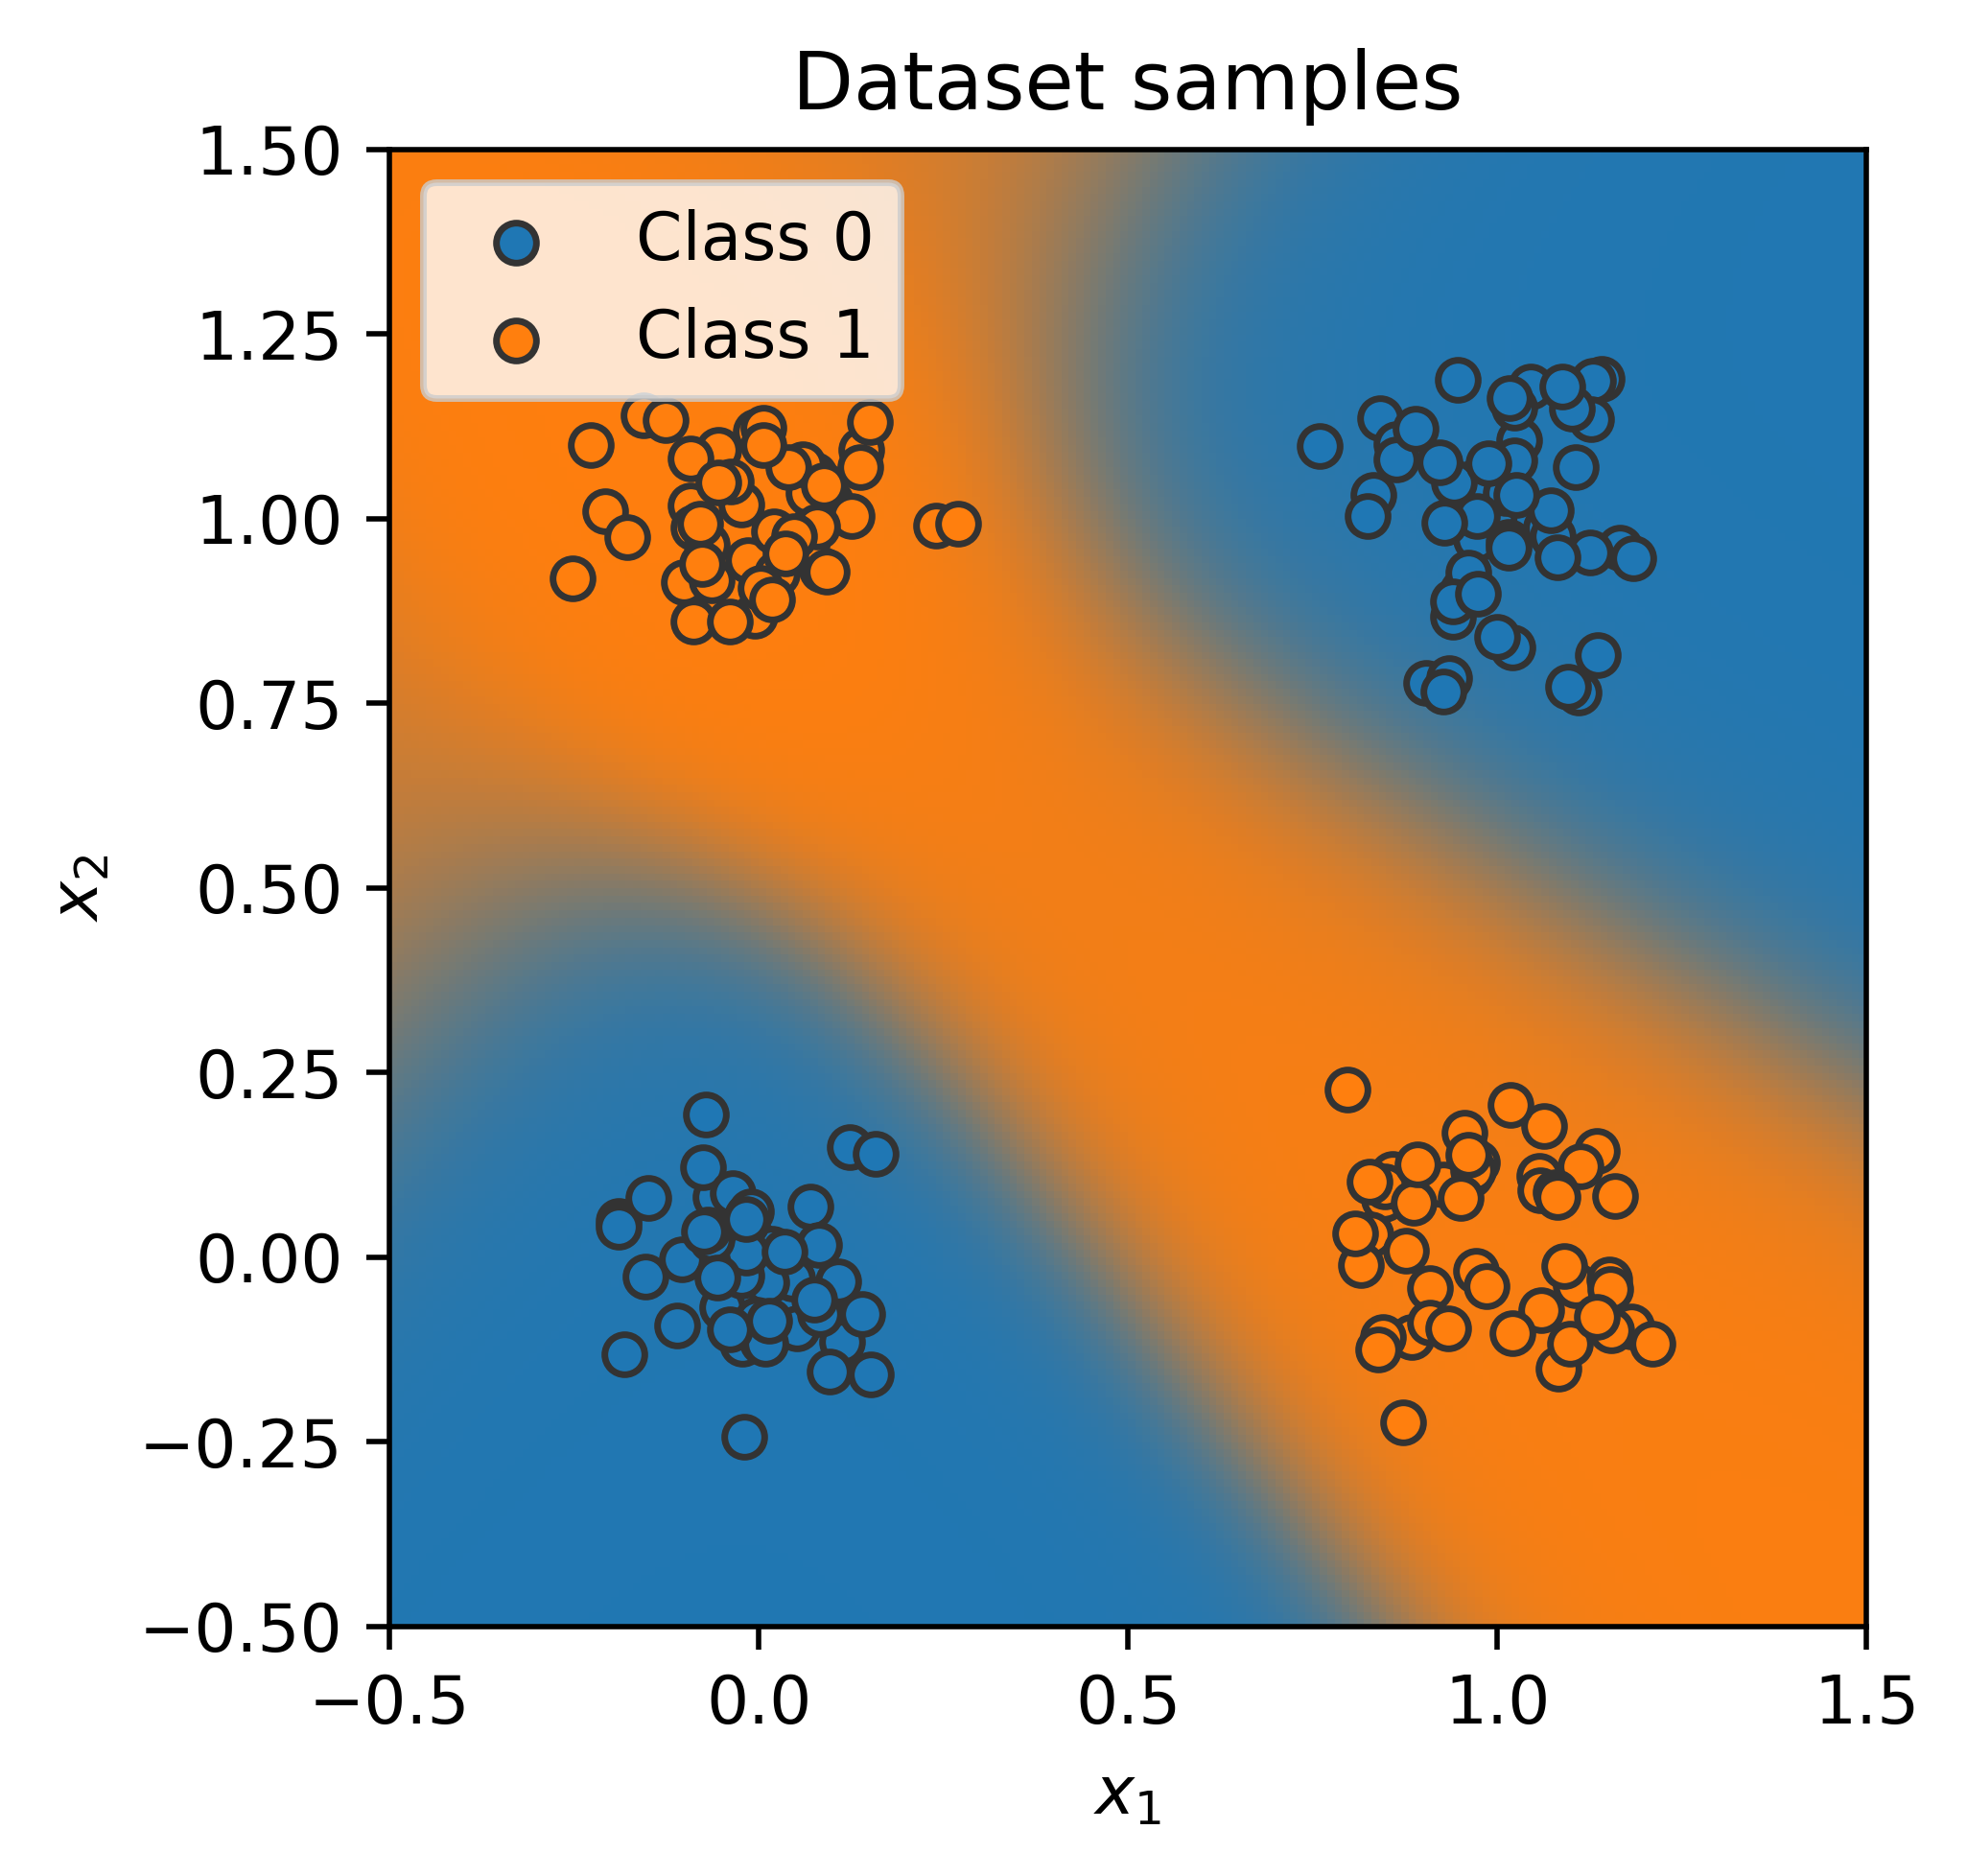

In [246]:
@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    
    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()
    
    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()

The decision boundaries might not look exactly as in the figure in the preamble of this section which can be caused by running it on CPU or a different GPU architecture. Nevertheless, the result on the accuracy metric should be the approximately the same. 

## Additional features we didn't get to discuss yet

Finally, you are all set to start with your own PyTorch project! In summary, we have looked at how we can build neural networks in PyTorch, and train and test them on data. However, there is still much more to PyTorch we haven't discussed yet. In the coming series of Jupyter notebooks, we will discover more and more functionalities of PyTorch, so that you also get familiar to PyTorch concepts beyond the basics. If you are already interested in learning more of PyTorch, we recommend the official [tutorial website](https://pytorch.org/tutorials/) that contains many tutorials on various topics. Especially logging with Tensorboard ([official tutorial here](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html)) is a good practice that we will explore further from Tutorial 5 on in combination with PyTorch Lightning.
Nonetheless, let's check it shortly out how we could use TensorBoard in our small example.

### TensorBoard logging

TensorBoard is a logging and visualization tool that is a popular choice for training deep learning models. Although initially published for TensorFlow, TensorBoard is also integrated in PyTorch allowing us to easily use it. First, let's import it below.

In [247]:
# Import tensorboard logger from PyTorch
from torch.utils.tensorboard import SummaryWriter

# Load tensorboard extension for Jupyter Notebook, only need to start TB in the notebook
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


The last line is required if you want to run TensorBoard directly in the Jupyter Notebook. Otherwise, you can start TensorBoard from the terminal.

PyTorch's TensorBoard API is simple to use. We start the logging process by creating a new object, `writer = SummaryWriter(...)`, where we specify the directory in which the logging file should be saved. With this object, we can log different aspects of our model by calling functions of the style `writer.add_...`. For example, we can visualize the computation graph with the function `writer.add_graph`, or add a scalar value like the loss with `writer.add_scalar`. Let's adapt our initial training function with adding a TensorBoard logger below.

In [248]:
def train_model_with_logger(model, optimizer, data_loader, loss_module, val_dataset, num_epochs=100, logging_dir='runs/our_experiment'):
    # Create TensorBoard logger
    writer = SummaryWriter(logging_dir)
    model_plotted = False
    
    # Set model to train mode
    model.train() 
    
    # Training loop
    for epoch in tqdm(range(num_epochs)):
        epoch_loss = 0.0
        for data_inputs, data_labels in data_loader:
            
            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)
            
            # For the very first batch, we visualize the computation graph in TensorBoard
            if not model_plotted:
                writer.add_graph(model, data_inputs)
                model_plotted = True
            
            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]
            
            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero. 
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad() 
            # Perform backpropagation
            loss.backward()
            
            ## Step 5: Update the parameters
            optimizer.step()
            
            ## Step 6: Take the running average of the loss
            epoch_loss += loss.item()
            
        # Add average loss to TensorBoard
        epoch_loss /= len(data_loader)
        writer.add_scalar('training_loss',
                          epoch_loss,
                          global_step = epoch + 1)
        
        # Visualize prediction and add figure to TensorBoard
        # Since matplotlib figures can be slow in rendering, we only do it every 10th epoch
        if (epoch + 1) % 10 == 0:
            fig = visualize_classification(model, val_dataset.data, val_dataset.label)
            writer.add_figure('predictions',
                              fig,
                              global_step = epoch + 1)
    
    writer.close()

Let's use this method to train a model as before, with a new model and optimizer.

In [249]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train_model_with_logger(model, optimizer, train_data_loader, loss_module, val_dataset=dataset)

100%|██████████| 100/100 [00:03<00:00, 29.52it/s]


The TensorBoard file in the folder `runs/our_experiment` now contains a loss curve, the computation graph of our network, and a visualization of the learned predictions over number of epochs. To start the TensorBoard visualizer, simply run the following statement:

In [250]:
%tensorboard --logdir runs/our_experiment

Reusing TensorBoard on port 6006 (pid 573515), started 0:01:01 ago. (Use '!kill 573515' to kill it.)

<center><img src="tensorboard_screenshot.png" width="1100px"></center>

TensorBoard visualizations can help to identify possible issues with your model, and identify situations such as overfitting. You can also track the training progress while a model is training, since the logger automatically writes everything added to it to the logging file. Feel free to explore the TensorBoard functionalities, and we will make use of TensorBoards a couple of times from Tutorial 5 on.